In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ukb_gwas import *
import pickle

## get locations and chromosomes for snps

In [ ]:
# Make dicts: chrom.position <=> snp (~30 seconds)
# positions_for_snps = {}
# snps_at_position = {}
# fpath = 'mover_status/'
# for i in np.arange(1,23):
#     chr_data = pd.read_csv(fpath + 'chr' + str(i) + '.all.glm.logistic',delimiter = '\t')
#     positions = chr_data.POS.tolist()
#     snps = chr_data.ID.tolist()
#     chrom_pos = [str(i) + '.' + str(x) for x in positions]
#     snps_at_position.update(dict(zip(chrom_pos,snps)))
#     positions_for_snps.update(dict(zip(snps,chrom_pos)))

In [ ]:
# pickle these dict . . . how long to save? ~ 12 seconds
# import pickle
# pickle.dump([positions_for_snps,snps_at_position],open('snp_positions.p','wb')) # ~8 seconds

In [2]:
[positions_for_snps,snps_at_position] = pickle.load(open('snp_positions.p','rb'))

## load GWAS catalog

In [3]:
gwas_catalog = pd.read_csv('gwas_catalog_pruned.tsv',delimiter = '\t')
traits = list(set(gwas_catalog['DISEASE/TRAIT'].tolist()))
gwas_catalog_snps = [x.split('-')[0] for x in gwas_catalog['STRONGEST SNP-RISK ALLELE'].tolist()]
gwas_catalog_chr = gwas_catalog.CHR_ID.tolist()
gwas_catalog_pos = gwas_catalog.CHR_POS.tolist()
chrom_positions = [str(gwas_catalog_chr[i]) + ':' + str(pos) for i,pos in enumerate(gwas_catalog_pos)]
gwas_catalog_positions = dict(zip(gwas_catalog_snps,chrom_positions))
gwas_catalog.head(3)

,STUDY,DISEASE/TRAIT,CHR_ID,CHR_POS,STRONGEST SNP-RISK ALLELE,RISK ALLELE FREQUENCY,P-VALUE,PVALUE_MLOG,P-VALUE (TEXT),OR or BETA,95% CI (TEXT),PLATFORM [SNPS PASSING QC],CNV
0,Identification of novel genetic markers associ...,systemic sclerosis,6,32441753,rs3129882-?,0.44,2E-27,26.69897,(ATA positive),2.17,[1.88-2.50],Illumina [NR] (imputed),N
1,Identification of novel genetic markers associ...,systemic sclerosis,6,33075103,rs987870-?,0.15,2E-20,19.69897,(ATA positive),2.09,[1.78-2.45],Illumina [NR] (imputed),N
2,Identification of novel genetic markers associ...,systemic sclerosis,6,32623148,rs3129763-?,0.25,1E-11,11.00000,(ATA positive),1.65,[1.42-1.91],Illumina [NR] (imputed),N


In [4]:
gwas_catalog[gwas_catalog.CHR_ID=='7 x 1'].head(1)

,STUDY,DISEASE/TRAIT,CHR_ID,CHR_POS,STRONGEST SNP-RISK ALLELE,RISK ALLELE FREQUENCY,P-VALUE,PVALUE_MLOG,P-VALUE (TEXT),OR or BETA,95% CI (TEXT),PLATFORM [SNPS PASSING QC],CNV
111112,Genome-wide search for gene-gene interactions ...,colorectal cancer (snp x snp interaction),7 x 1,25094230 x 221991606,rs39453-? x rs6687758-?,0.63,2E-6,5.69897,NaN,1.28,[1.16-1.43],Illumina [2011668],N


In [5]:
# extract a specific trait from the GWAS catalog . . .
intelligence = ['intelligence','cognitive ability','cognitive ability (mtag)','extremely high intelligence']
intelligenceTraits = []
for s in intelligence:
    intelligenceTraits.extend([x for x in traits if s == x])
print(intelligenceTraits)

intelligence_snps = gwas_catalog[gwas_catalog['DISEASE/TRAIT'].isin(intelligenceTraits)]['STRONGEST SNP-RISK ALLELE'].tolist()
intelligence_snps = [x.split('-')[0] for x in intelligence_snps]
intelligence_snps = list(set(intelligence_snps))
print(len(intelligence_snps))
print(intelligence_snps[:5])

['intelligence', 'cognitive ability', 'cognitive ability (mtag)', 'extremely high intelligence']
660
['rs10070734', 'rs10779271', 'rs4962322', 'rs7581162', 'rs5753383']


In [6]:
# getting standard snp set for EDUYEARS
eduyears_lead_snps = pd.read_excel('41588_2018_147_MOESM3_ESM.xlsx', 
                                  sheet_name = '2. EduYears Lead SNPs',
                                  skipfooter = 2, header = 1, index_col = None )
ea_snplist = eduyears_lead_snps.SNP.tolist()
print(len(ea_snplist))
print(ea_snplist[:5])

1271
['rs9859556', 'rs7029718', 'rs1334297', 'rs9375188', 'rs2526398']


In [7]:
# getting standard snp set for HEIGHT
height_giant = pd.read_csv('giant_locke_2018_height_snps.txt',delimiter = '\t')
height_snplist = height_giant.SNP.tolist()
height_poslist = height_giant.POS.tolist()
height_chrlist = height_giant.CHR.tolist()
chrom_positions = [str(height_chrlist[i]) + ':' + str(pos) for i,pos in enumerate(height_poslist)]
height_giant_positions = dict(zip(height_snplist,chrom_positions))

print(len(height_snplist))
print(height_snplist[:5])

3290
['rs10003497', 'rs1000410', 'rs10008015', 'rs10010325', 'rs10016290']


In [8]:
# getting standard snp set for BMI
bmi_giant = pd.read_csv('Locke_GIANT_bmi_snps.txt',delimiter = '\t')
bmi_snplist = bmi_giant.SNP.tolist()
bmi_poslist = bmi_giant.POS.tolist()
bmi_chrlist = bmi_giant.CHR.tolist()
chrom_positions = [str(bmi_chrlist[i]) + ':' + str(pos) for i,pos in enumerate(bmi_poslist)]
bmi_giant_positions = dict(zip(bmi_snplist,chrom_positions))
print(len(bmi_snplist))
print(bmi_snplist[:5])

941
['rs1000096', 'rs1000940', 'rs1003081', 'rs10035289', 'rs10037047']


In [9]:
# Add GIANT snps to gwas catalog
print(len(gwas_catalog_positions))
gwas_catalog_positions.update(height_giant_positions)
print(len(gwas_catalog_positions))
gwas_catalog_positions.update(bmi_giant_positions)
print(len(gwas_catalog_positions))

97289
99937
100571


In [10]:
autism = ['autism','Autism']
autismTraits = [x for x in traits if 'autism' in x]
print(autismTraits)
autism_snps = gwas_catalog[gwas_catalog['DISEASE/TRAIT'].isin(autismTraits)]['STRONGEST SNP-RISK ALLELE'].tolist()
autism_snps = [x.split('-')[0] for x in autism_snps]
print(len(autism_snps))
print(autism_snps[:5])

['autism spectrum disorder or schizophrenia', 'autism', 'autism and major depressive disorder (mtag)', 'autism spectrum disorder-related traits', 'restricted and repetitive behaviours in autism spectrum disorder', 'autism spectrum disorder, attention deficit-hyperactivity disorder, bipolar disorder, major depressive disorder, and schizophrenia (combined)', 'obsessive-compulsive disorder or autism spectrum disorder', 'autism spectrum disorder', 'autism and schizophrenia (mtag)', 'autism and educational attainment (mtag)']
486
['rs4141463', 'rs7142002', 'rs1533087', 'rs1107592', 'rs6602217']


In [11]:
risk = ['risk-taking','adventurousness','risk tolerance']
riskTraits = []
for s in risk:
    riskTraits.extend([x for x in traits if s in x])
print(riskTraits)

risk_snps = gwas_catalog[gwas_catalog['DISEASE/TRAIT'].isin(riskTraits)]['STRONGEST SNP-RISK ALLELE'].tolist()
risk_snps = [x.split('-')[0] for x in risk_snps]
print(len(risk_snps))
print(risk_snps[:5])

['self-reported risk-taking behaviour', 'risk-taking tendency (4-domain principal component model)', 'adventurousness', 'general risk tolerance (mtag)']
661
['rs62250759', 'rs560977020', 'rs2304681', 'rs542809491', 'rs9841382']


In [12]:
alcohol = ['drinks per week','max-drinks']
alcoholTraits = []
for s in alcohol:
    alcoholTraits.extend([x for x in traits if s in x])
print(alcoholTraits)

alcohol_snps = gwas_catalog[gwas_catalog['DISEASE/TRAIT'].isin(alcoholTraits)]['STRONGEST SNP-RISK ALLELE'].tolist()
alcohol_snps = [x.split('-')[0] for x in alcohol_snps]
print(len(alcohol_snps))
print(alcohol_snps[:5])

['alcohol consumption (drinks per week)', 'alcohol consumption (drinks per week) (mtag)', 'alcohol consumption (max-drinks)']
361
['rs6882716', 'rs7928758', 'rs671', 'rs780094', 'rs11940694']


In [13]:
sleep = ['sleep duration']
sleepTraits = []
for s in sleep:
    sleepTraits.extend([x for x in traits if s in x])
print(sleepTraits)
sleepTraits = sleepTraits[1:]
print(sleepTraits)

sleep_snps = gwas_catalog[gwas_catalog['DISEASE/TRAIT'].isin(sleepTraits)]['STRONGEST SNP-RISK ALLELE'].tolist()
sleep_snps = [x.split('-')[0] for x in sleep_snps]
print(len(sleep_snps))
print(sleep_snps[:5])

['sleep duration (short sleep)', 'sleep duration', 'hypertension risk in short sleep duration', 'sleep duration (long sleep)', 'sleep duration (oversleepers vs undersleepers)']
['sleep duration', 'hypertension risk in short sleep duration', 'sleep duration (long sleep)', 'sleep duration (oversleepers vs undersleepers)']
199
['rs660899', 'rs2226284', 'rs225212', 'rs62158211', 'rs17190618']


In [14]:
lonelinessTraits = ['loneliness']

loneliness_snps = gwas_catalog[gwas_catalog['DISEASE/TRAIT'].isin(lonelinessTraits)]['STRONGEST SNP-RISK ALLELE'].tolist()
loneliness_snps = [x.split('-')[0] for x in loneliness_snps]
print(len(loneliness_snps))
print(loneliness_snps[:5])

37
['rs76554764', 'rs34656763', 'rs116256240', 'rs79210778', 'rs77766537']


In [15]:
neuroticismTraits = ['neuroticism']

neuroticism_snps = gwas_catalog[gwas_catalog['DISEASE/TRAIT'].isin(neuroticismTraits)]['STRONGEST SNP-RISK ALLELE'].tolist()
neuroticism_snps = [x.split('-')[0] for x in neuroticism_snps]
print(len(neuroticism_snps))
print(neuroticism_snps[:5])

1107
['rs6981523', 'rs9611519', 'rs10172965', 'rs10244364', 'rs10406374']


In [16]:
smoking = ['smoking behaviour','ever smoking']
smokingTraits = []
for s in smoking:
    smokingTraits.extend([x for x in traits if s in x])
print(smokingTraits)
smokingTraits = smokingTraits[2:4]
print(smokingTraits)
smoking_snps = gwas_catalog[gwas_catalog['DISEASE/TRAIT'].isin(smokingTraits)]['STRONGEST SNP-RISK ALLELE'].tolist()
smoking_snps = [x.split('-')[0] for x in smoking_snps]
print(len(smoking_snps))
print(smoking_snps[:5])

['waist-to-hip ratio adjusted for bmi (adjusted for smoking behaviour)', 'waist circumference adjusted for bmi (adjusted for smoking behaviour)', 'smoking behaviour (maximum cigarettes in a 24 hour period)', 'smoking behaviour (cigarettes smoked per day)', 'bmi (adjusted for smoking behaviour)', 'waist-to-hip circumference ratio (ever vs never smoking interaction)', 'body mass index (ever vs never smoking interaction)']
['smoking behaviour (maximum cigarettes in a 24 hour period)', 'smoking behaviour (cigarettes smoked per day)']
81
['rs1372626', 'rs28672990', 'rs139188551', 'rs2353663', 'rs146274783']


## for exclude regions & qqplot . . . load the mover status GWAS

In [4]:
# load via pandas below, or load genomic control pvals directly
pvalDict = pickle.load(open('genomic_control_moverstatus_bc_propcs40.p','rb'))

In [17]:
fdir = 'moverstatus_wbabornclose_propcs40'
chrom = 1
fname = fdir + '/chr' + str(chrom) + '.all.glm.logistic'
chromDf = pd.read_csv(fname,delimiter = '\t')
chromDf.head(4)

,#CHROM,POS,ID,REF,ALT,A1,TEST,OBS_CT,OR,LOG(OR)_SE,Z_STAT,P
0,1,10616,1:10616_CCGCCGTTGCAAAGGCGCGCCG_C,C,CCGCCGTTGCAAAGGCGCGCCG,CCGCCGTTGCAAAGGCGCGCCG,ADD,256035,1.027620,0.059150,0.460601,0.645085
1,1,13110,rs540538026,A,G,A,ADD,256035,1.028050,0.020117,1.374980,0.169138
2,1,14933,rs199856693,A,G,A,ADD,256035,0.995934,0.022215,-0.183403,0.854482
3,1,16949,rs199745162,C,A,C,ADD,256035,0.983278,0.032059,-0.526029,0.598868


In [7]:
# # get pvals and zstats for all snps in the GWAS
# pvalDict = {}
# #fdir = 'mover_status'
# #fdir = 'mover_status_bornclose'
# fdir = 'moverstatus_wbabornclose_propcs40'
# for chrom in np.arange(1,23):
#     fname = fdir + '/chr' + str(chrom) + '.all.glm.logistic'
#     chromDf = pd.read_csv(fname,delimiter = '\t')
#     pvalDict.update(dict(zip(chromDf.ID.values, chromDf.P.values)))

In [60]:
# start here to exclude
# snps_to_exclude = list(set(bmi_snplist + height_snplist + ea_snplist + intelligence_snps + autism_snps + 
#                            neuroticism_snps + risk_snps))
snps_to_exclude = ea_snplist + bmi_snplist
print(len(snps_to_exclude))
print(snps_to_exclude[3])
print(positions_for_snps[snps_to_exclude[3]])

2212
rs9375188
6.98555272


In [61]:
# make dict of excluded regions: chrom => [(s1,e1), (s2,e2) . . . , (sn, en)]
excluded_regions = {}
bufferSize = 500000

positionDict = gwas_catalog_positions 

for snp in snps_to_exclude:
    
    if 'x' in positionDict[snp]: # some GWAS catalog entries have interactions, skip these
        bp = 0
    
    elif ';' in positionDict[snp]: # some GWAS catalog entried have multiple snps, choose 1st
        chrom = int(positionDict[snp].split(';')[0])
        bp = int(float(positionDict[snp].split(':')[1].split(';')[0]))
    
    elif 'nan' not in positionDict[snp]:
        #print(gwas_catalog_positions[snp])
        chrom = int(positionDict[snp].split(':')[0])
        bp = int(float(positionDict[snp].split(':')[1]))
    
    if bp > 0:
    
        start_end = (bp-bufferSize,bp+bufferSize) 


        if chrom in excluded_regions.keys():
            excluded_regions[chrom].append(start_end)
        else:
            excluded_regions[chrom] = [start_end]

In [62]:
for chrom in np.arange(1,23):
    if chrom in excluded_regions.keys():
        print(chrom, len(excluded_regions[chrom]))# , excluded_regions[chrom])

1 179
2 240
3 189
4 111
5 142
6 158
7 129
8 100
9 92
10 81
11 118
12 106
13 59
14 66
15 65
16 101
17 70
18 75
19 34
20 60
21 19
22 18


In [63]:
# go through each chromosome on GWAS, and filter out SNPs that are within the excluded regions.
# WORKING
all_included_snps = []

for chrom in np.arange(1,23):
    print('doing chromosome ', chrom)
    
    # get Positions of GWAS snps on the chromosome ... parse keys to get positions
    position_keys = [x for x in snps_at_position.keys() if int(x.split('.')[0]) == chrom]
    positions_on_chrom = np.array([int(x.split('.')[1]) for x in position_keys])
    
    # each excluded region on chromosome ... remove positions within that region
    inc = positions_on_chrom
    if chrom in excluded_regions.keys():
        for region in excluded_regions[chrom]:
            s = region[0]
            e = region[1]
            inc = np.hstack([inc[np.where(inc<s)],inc[np.where(inc>e)]])
    
        # now have included positions ... get a list of snps at these positions.
        snps_on_chrom = [snps_at_position[str(chrom) + '.' + str(x)] for x in inc]

        # add these snps to snps for whole genome
        all_included_snps.extend(snps_on_chrom)

doing chromosome  1
doing chromosome  2
doing chromosome  3
doing chromosome  4
doing chromosome  5
doing chromosome  6
doing chromosome  7
doing chromosome  8
doing chromosome  9
doing chromosome  10
doing chromosome  11
doing chromosome  12
doing chromosome  13
doing chromosome  14
doing chromosome  15
doing chromosome  16
doing chromosome  17
doing chromosome  18
doing chromosome  19
doing chromosome  20
doing chromosome  21
doing chromosome  22


In [64]:
# great, now have filtered snps. QQplot those puppies.
filtered_pvals = np.array([pvalDict[x] for x in all_included_snps if x in pvalDict.keys()])
print(len(filtered_pvals))
# filtered_pvals_no_nan = filtered_pvals[np.where(np.isnan(filtered_pvals) == False)]
# print(len(filtered_pvals_no_nan))

6117240


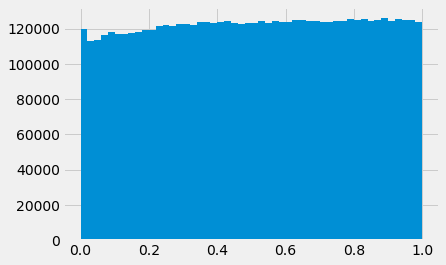

In [65]:
plt.hist(filtered_pvals,50)
plt.show()

In [66]:
all_pvals = np.array(list(pvalDict.values()))
print(len(all_pvals))
# all_pvals_no_nan = all_pvals[np.where(np.isnan(all_pvals) == False)]
# print(len(all_pvals_no_nan))

11100786


In [67]:
# get read to qq plot: sort
sorted_pvals = sorted(all_pvals)
sorted_filtered_pvals = sorted(filtered_pvals)

In [68]:
print(sorted_pvals[:5])
print(sorted_filtered_pvals[:5])

[8.604316098015935e-12, 8.968380096908381e-12, 1.0128306541174178e-11, 1.133242553146831e-11, 1.1334594070724345e-11]
[1.0800228749012736e-09, 1.4529515076362203e-09, 1.4529515076362203e-09, 1.870674397980383e-09, 8.702426119812269e-09]


In [57]:
# downsample to reduce size of vectors
#(source_list[i] for i in xrange(0, len(source_list), 10))
# smaller_pvals = list(sorted_pvals[i] for i in range(0, len(sorted_pvals), 100))
# smaller_filtered_pvals = list(sorted_filtered_pvals[i] for i in range(0, len(sorted_filtered_pvals), 100))

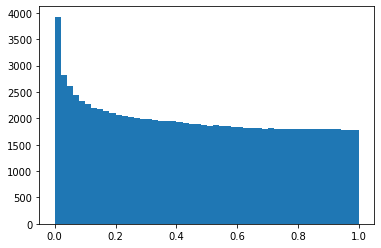

In [20]:
# plt.hist(smaller_filtered_pvals,50)
# plt.show()

In [35]:
def qqplot(lists_of_pvals, labels, fs = (8,4)):
    plt.style.use('fivethirtyeight')
    cols = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
    
    # which list is longest?
    max_len = max([len(x) for x in lists_of_pvals])
    
    # plot y = x
    yxvals = np.linspace(0,1,max_len)
    yxvals = yxvals[1:]
    log_yx = sorted(-np.log10(yxvals))
    
    f,a = plt.subplots(1,1,figsize = fs)
    a.scatter(log_yx, log_yx, c = 'k', label = 'y=x')
    
    for i, pvals in enumerate(lists_of_pvals):
        sorted_pvals = sorted(pvals)
        exp_pvals = np.linspace(0,1,len(sorted_pvals))
        
        obs_pvals = sorted_pvals[1:]
        exp_pvals = exp_pvals[1:]
        
        log_obs = sorted(-np.log10(obs_pvals))
        log_exp = sorted(-np.log10(exp_pvals))
        
        a.scatter(log_exp, log_obs, c = cols[i], label = labels[i])
   
    plt.legend(loc='upper left')
    plt.ylabel('Observed -log10(p)')
    plt.xlabel('Expected -log10(p)')
    
    plt.show()

[8.604316098015935e-12, 8.968380096908381e-12, 1.0128306541174178e-11, 1.133242553146831e-11]
[1.0800228749012736e-09, 1.4529515076362203e-09, 1.4529515076362203e-09, 1.870674397980383e-09]


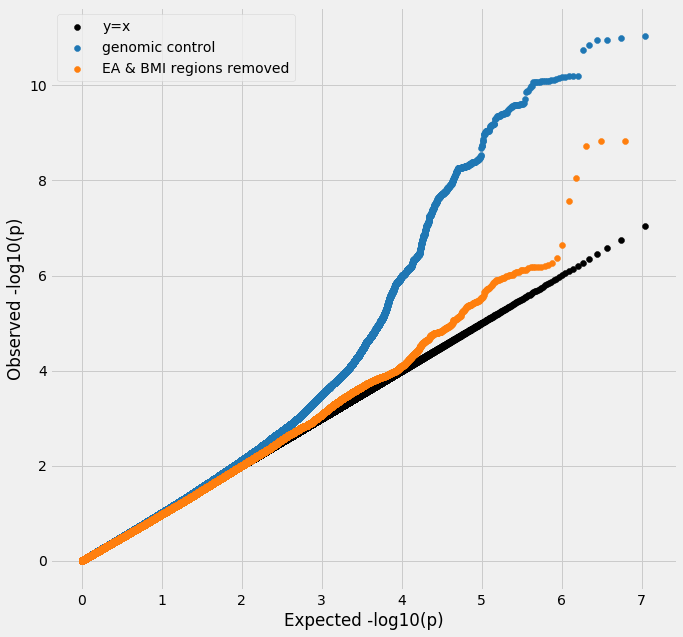

In [69]:
# try a combo:
# snps_to_exclude = list(set(bmi_snplist + height_snplist + ea_snplist + intelligence_snps + autism_snps + 
#                            neuroticism_snps + risk_snps))
# 8106 snps!
print(sorted_pvals[:4])
print(sorted_filtered_pvals[:4])
qqplot([sorted_pvals,sorted_filtered_pvals],['genomic control','EA & BMI regions removed'],(10,10))

In [59]:
# code up something that reports how much is excluded? in excluded_regions ... but there's probably overlap.
# can just take total pvals - filtered pvals = # snps excluded.....
print(len(sorted_pvals) - len(sorted_filtered_pvals))
print(len(sorted_pvals))
print(len(sorted_filtered_pvals))

4058118
11100786
7042668


In [ ]:
# x-smoking, x-neuroticism, x-loneliness, x-sleep, x-alcohol, x-risk, x-autism, x-intelligence <== all from GWAS catalog
# bmi_snplist, x-height_snplist <== ... need to get positions for these snps.
# x-ea_snplist <== lee ... have positions of all of these in GWAS catalog !

# genomic control

In [209]:
# save to cbsu and do it there? ... doesn't have scipy, can't pip install, so do it here
# load pvalDict via pandas and chromosomes
print(len(pvalDict))

11102230


In [215]:
# convert pvals to chi-stats
chistat_dict = {x:stats.chi2.isf(pvalDict[x], 1) for x in pvalDict.keys()} # 11:57pm!

In [216]:
# save intermdiate for later
pickle.dump([pvalDict,chistat_dict],open('moverstatus_wbabornclose_propcs40.p','wb')) 

In [230]:
# get median chi-stat
print(np.nanmedian(np.array(list(chistat_dict.values())))) 

0.5721647056821395


In [226]:
# lambda = genome inflation value
inflation_lambda = (np.nanmedian(np.array(list(chistat_dict.values())))) / (0.675**2)
print(inflation_lambda)

1.2557798752968767


In [227]:
# divide all chi-squared values by lambda
corrected_chisq = {x:chistat_dict[x]/inflation_lambda for x in chistat_dict.keys() if np.isnan(chistat_dict[x]) == False}

In [229]:
# check that median is now ~0.456
print(np.median(np.array(list(corrected_chisq.values()))))

0.45562500000000006


In [233]:
# make sure I am calculating p's from Chi^2's correctly
stats.distributions.chi2.sf(3.84,1)

0.05004352124870519

In [234]:
# convert chi^2's to p's
# takes a LONG time!
corrected_pvals = {x: stats.distributions.chi2.sf(corrected_chisq[x], 1) for x in corrected_chisq.keys()}

In [235]:
# save dictionary!
pickle.dump(corrected_pvals,open('genomic_control_moverstatus_bc_propcs40.p','wb'))